In [1]:
import fbprophet
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_excel("/content/dust.xlsx")
df = df[['Sensor Value']]
df

,Sensor Value
0,0.10
1,0.10
2,0.10
3,0.10
4,0.10
...,...
1238,0.12
1239,0.12
1240,0.12
1241,0.13


In [4]:
Days = pd.date_range(start="2017-09-07",end="2020-06-25")
dataframe = pd.DataFrame()
dataframe['ds'] = Days
dataframe['ds'] = dataframe['ds'].dt.date
dataframe['y'] = df[['Sensor Value']]
dataframe

,ds,y
0,2017-09-07,0.10
1,2017-09-08,0.10
2,2017-09-09,0.10
3,2017-09-10,0.10
4,2017-09-11,0.10
...,...,...
1018,2020-06-21,0.14
1019,2020-06-22,0.12
1020,2020-06-23,0.13
1021,2020-06-24,0.17


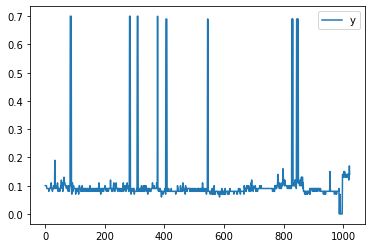

In [5]:
dataframe.plot()

In [6]:
from fbprophet import Prophet
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [7]:
size = (70/100) * len(dataframe)
train = dataframe[0:int(size)]
test = dataframe[int(size):]

In [8]:
model = Prophet()

In [9]:
model.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [11]:
futureDates = model.make_future_dataframe(periods=len(test))
predictions = model.predict(futureDates)
predictions = predictions.tail(len(test))
predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
716,2019-08-24,0.085189,-0.031203,0.206657,0.085189,0.085189,0.003488,0.003488,0.003488,0.003488,0.003488,0.003488,0.0,0.0,0.0,0.088677
717,2019-08-25,0.085137,-0.031238,0.206593,0.085137,0.085137,0.003816,0.003816,0.003816,0.003816,0.003816,0.003816,0.0,0.0,0.0,0.088954
718,2019-08-26,0.085085,-0.043891,0.196619,0.085085,0.085085,-0.008494,-0.008494,-0.008494,-0.008494,-0.008494,-0.008494,0.0,0.0,0.0,0.076592
719,2019-08-27,0.085033,-0.037646,0.190175,0.085033,0.085033,-0.008557,-0.008557,-0.008557,-0.008557,-0.008557,-0.008557,0.0,0.0,0.0,0.076476
720,2019-08-28,0.084982,-0.028820,0.199345,0.084982,0.084982,0.003626,0.003626,0.003626,0.003626,0.003626,0.003626,0.0,0.0,0.0,0.088608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2020-06-21,0.069524,-0.048516,0.186741,0.068071,0.070985,0.003816,0.003816,0.003816,0.003816,0.003816,0.003816,0.0,0.0,0.0,0.073340
1019,2020-06-22,0.069472,-0.061557,0.181559,0.068014,0.070939,-0.008494,-0.008494,-0.008494,-0.008494,-0.008494,-0.008494,0.0,0.0,0.0,0.060978
1020,2020-06-23,0.069420,-0.052295,0.181514,0.067954,0.070893,-0.008557,-0.008557,-0.008557,-0.008557,-0.008557,-0.008557,0.0,0.0,0.0,0.060863
1021,2020-06-24,0.069368,-0.041089,0.188080,0.067894,0.070849,0.003626,0.003626,0.003626,0.003626,0.003626,0.003626,0.0,0.0,0.0,0.072995


In [15]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test[['y']],predictions[['yhat']])
mse


0.010654052676232578

In [13]:
import pickle
import pickle
with open('/content/dust_model_fbprohpet.pkl', 'wb') as fid:
    pickle.dump(model, fid)

In [14]:
preds = predictions['yhat'].tolist()

In [18]:
forecasting={
    
    'Day-1':preds[0],
    'Day-2':preds[1],
    'Day-3':preds[2],
    'Day-4':preds[3],
    'Day-5':preds[4],
    'Day-6':preds[5],
    'Day-7':preds[6],
    'MSE': mse
}

In [20]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db
cred = credentials.Certificate("../content/sensors-forecasting-fc27d-firebase-adminsdk-krgvi-403182645e.json")
firebase_admin.initialize_app(cred,{'databaseURL':'https://sensors-forecasting-fc27d-default-rtdb.firebaseio.com/'})
ref = db.reference("/Models/fbProphet")
upload_ref = ref.child('Dust')
upload_ref.update(forecasting)